In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/drive/MyDrive/LLM Interpretability/vis_df_all.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Type,Layer,Class1,Class2,Pearson_Correlation,Spearman_Correlation,Cosine_Similarity,Jaccard_Similarity
0,res,0,empathetic_dialogue,empathetic_dialogue,1.000000,1.000000,1.000000,1.000000
1,res,0,empathetic_dialogue,math,0.616850,0.505007,0.619804,0.124891
2,res,0,empathetic_dialogue,mmlu,0.810214,0.646009,0.811378,0.270021
3,res,0,empathetic_dialogue,programming,0.465998,0.615204,0.470735,0.131555
4,res,0,math,empathetic_dialogue,0.616850,0.505007,0.619804,0.124891


In [ ]:
def get_graph(typ, algorithm):
  df_temp = df[(df['Type'] == typ) & (df[algorithm] == algorithm)][['Type', 'Layer', 'Class1', 'Class2']]
  return df_temp

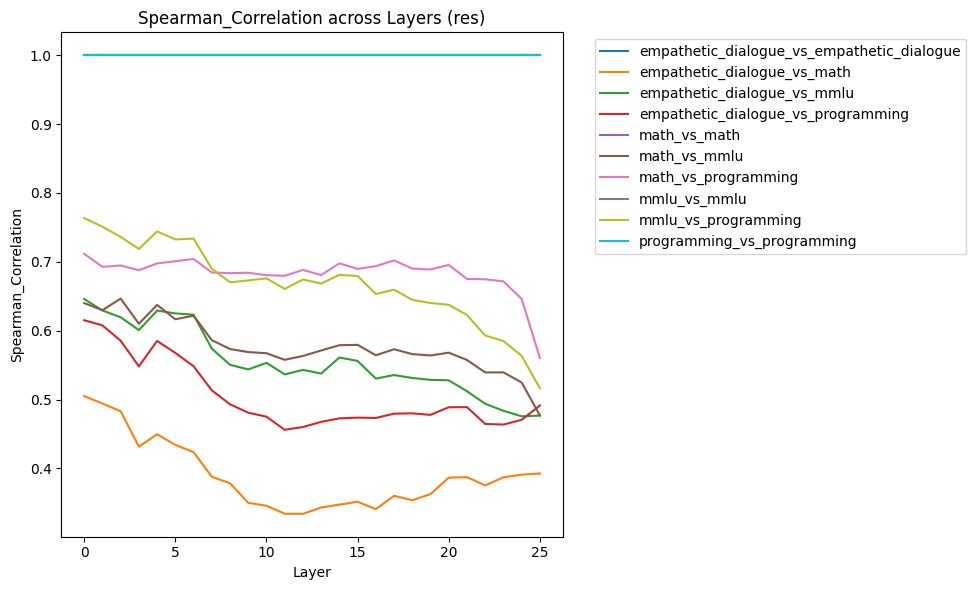

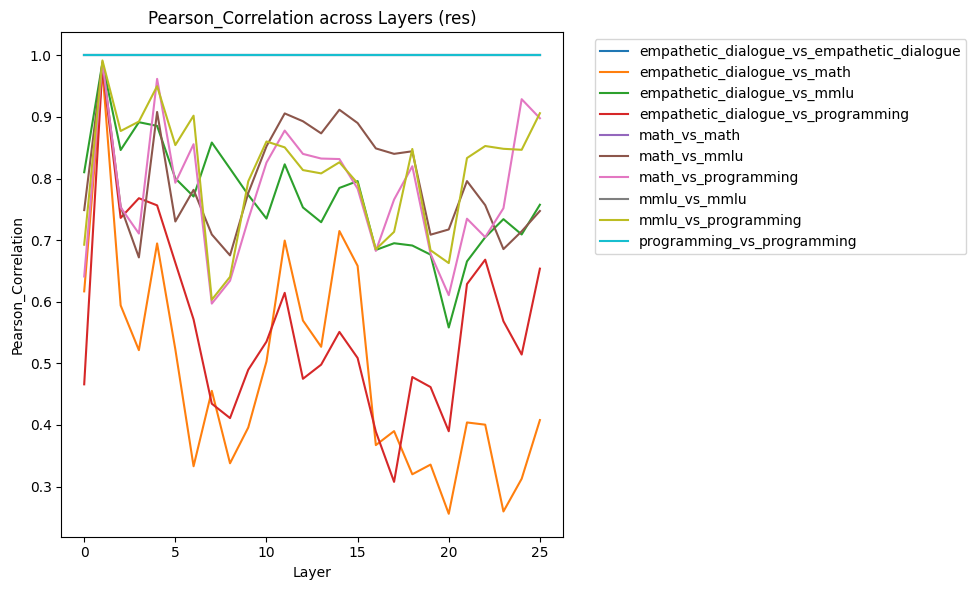

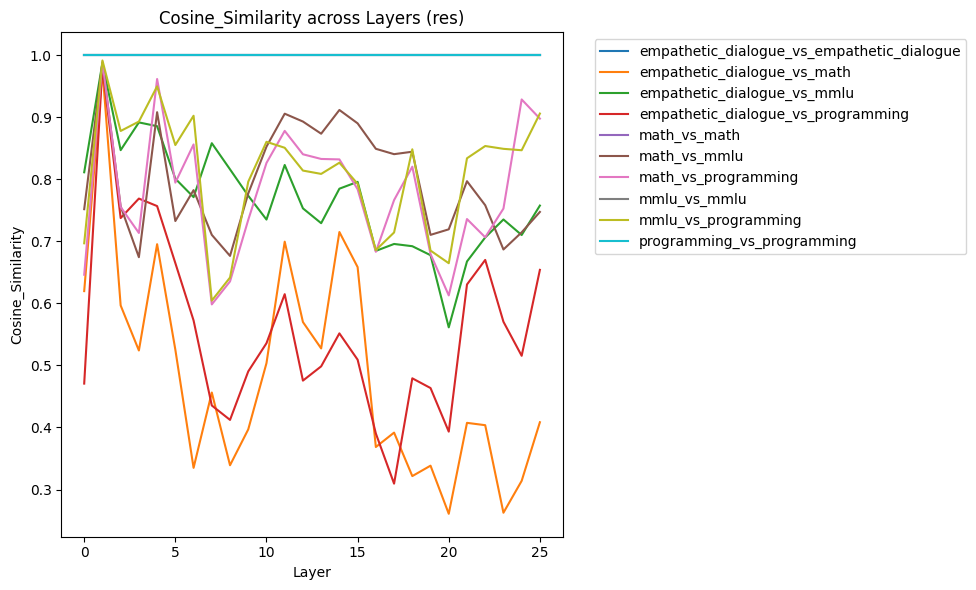

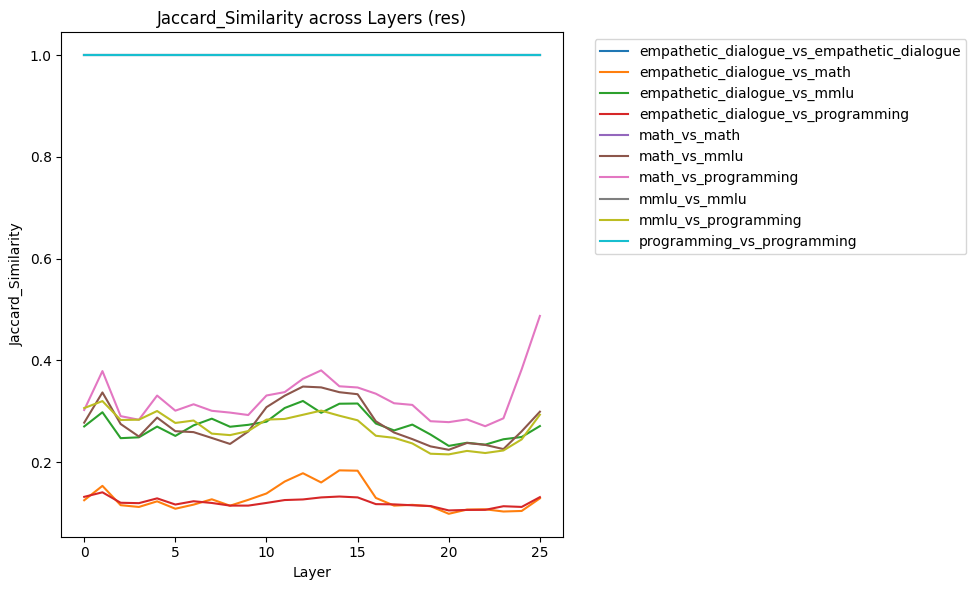

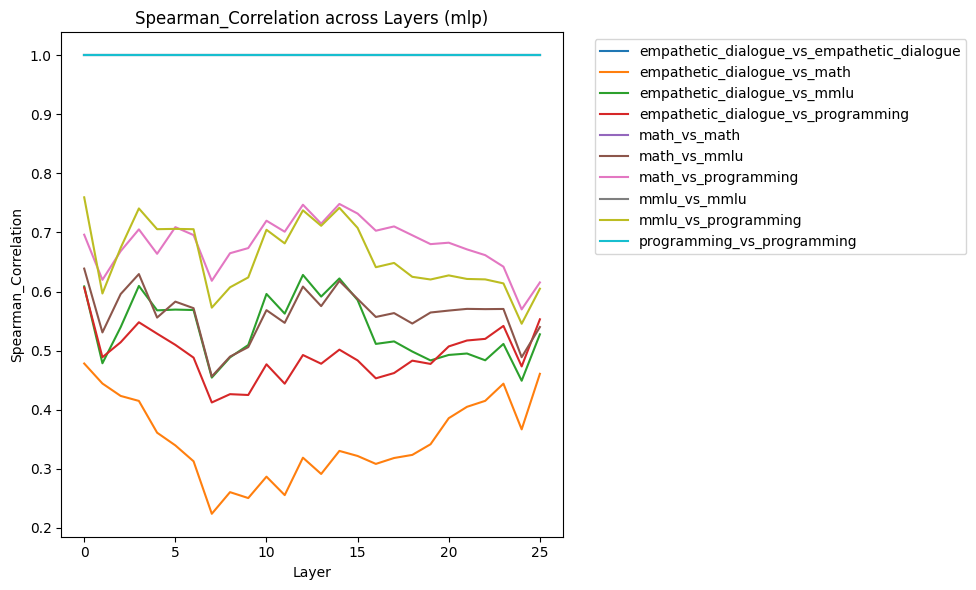

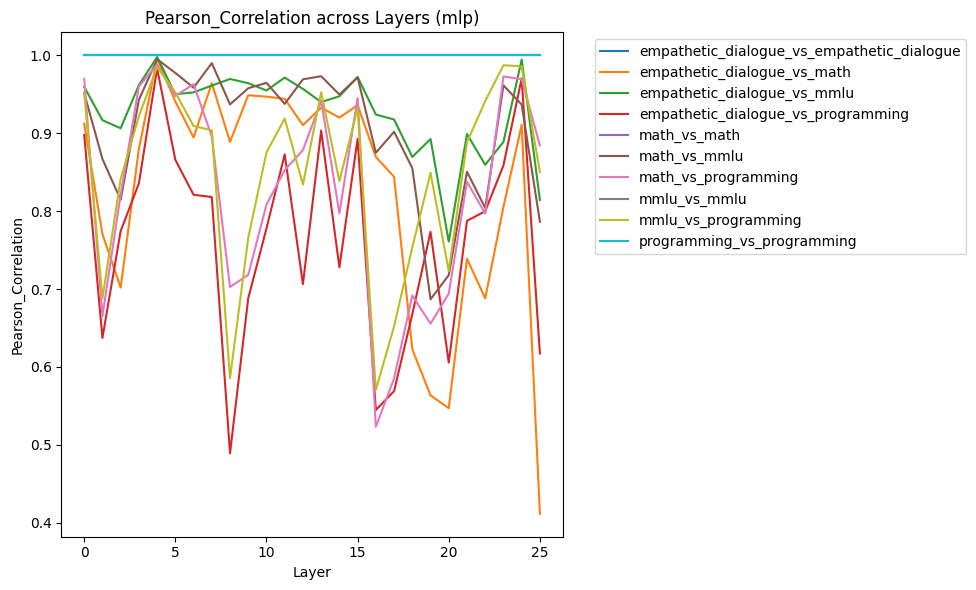

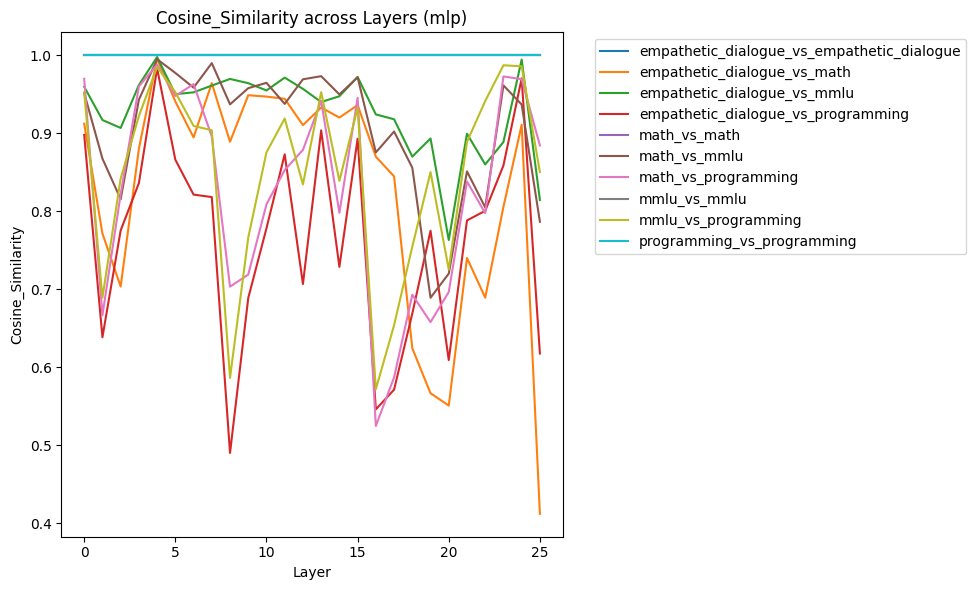

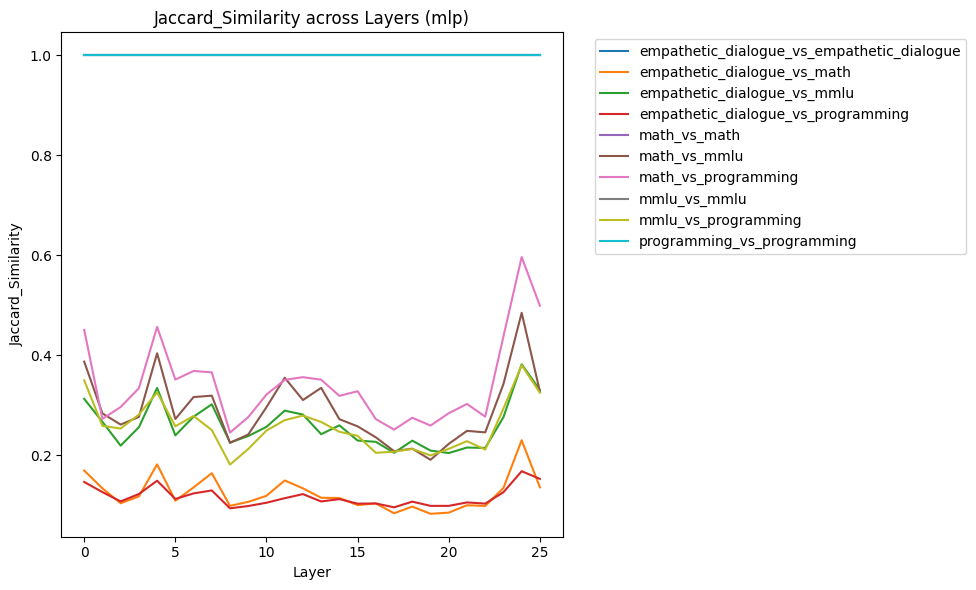

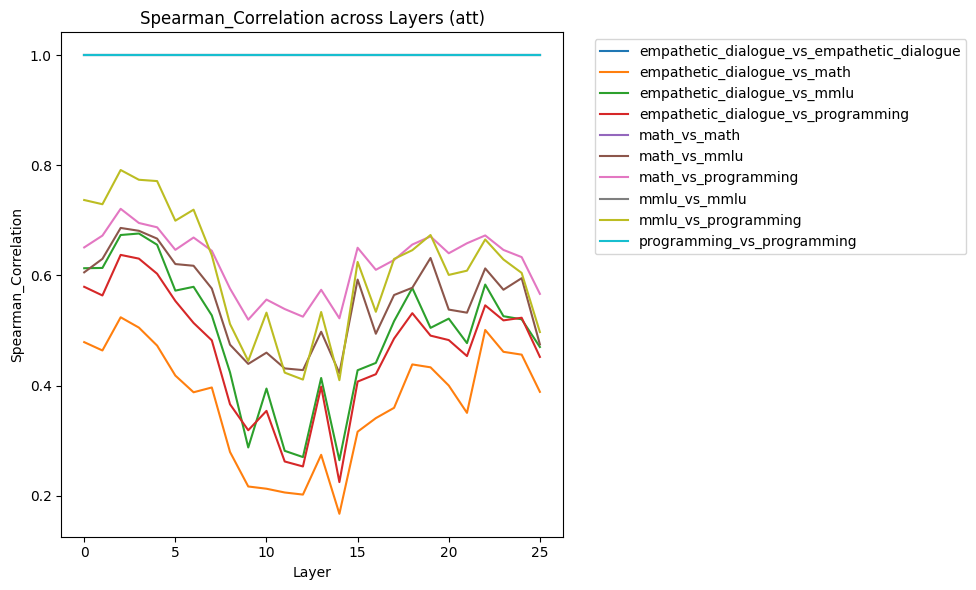

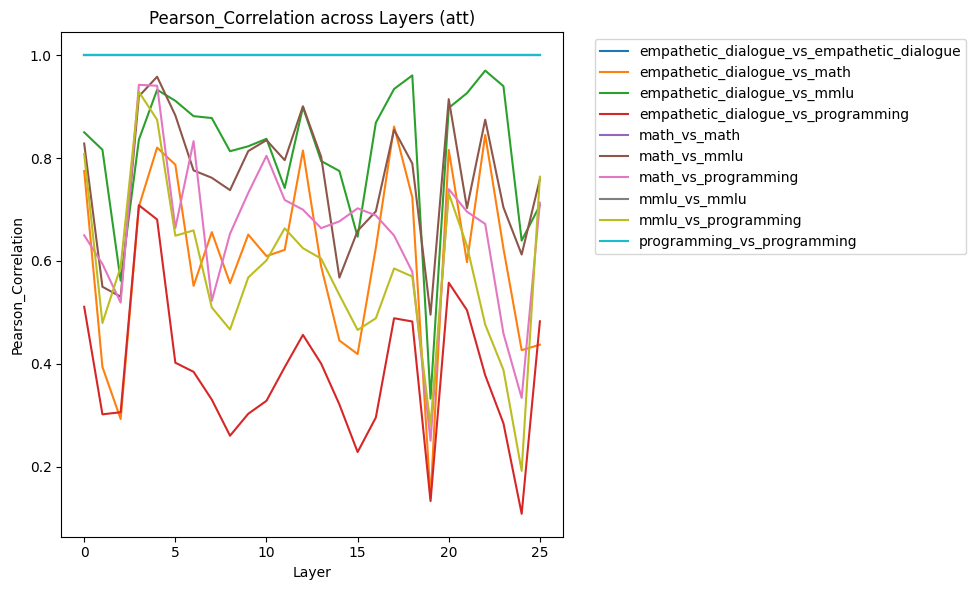

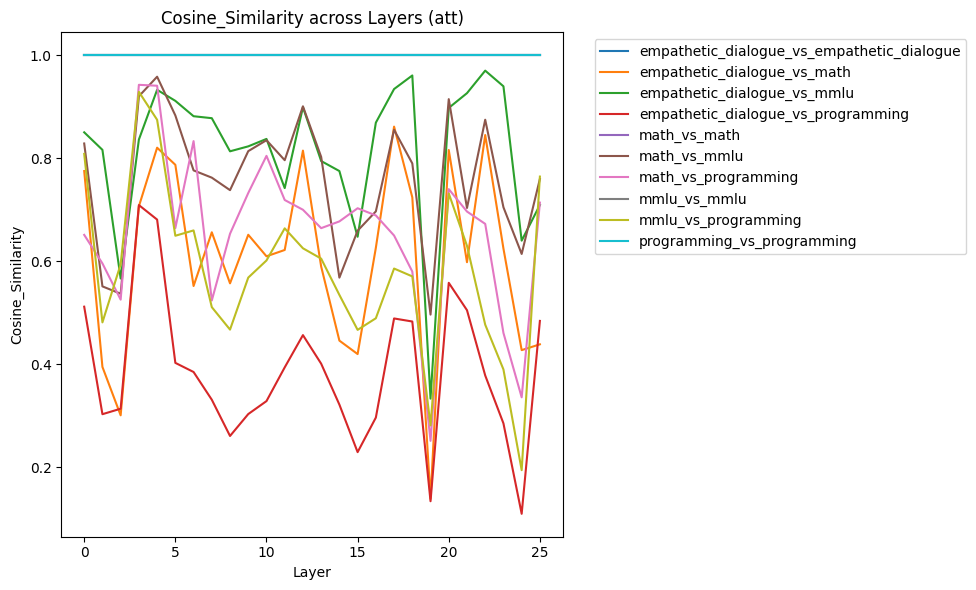

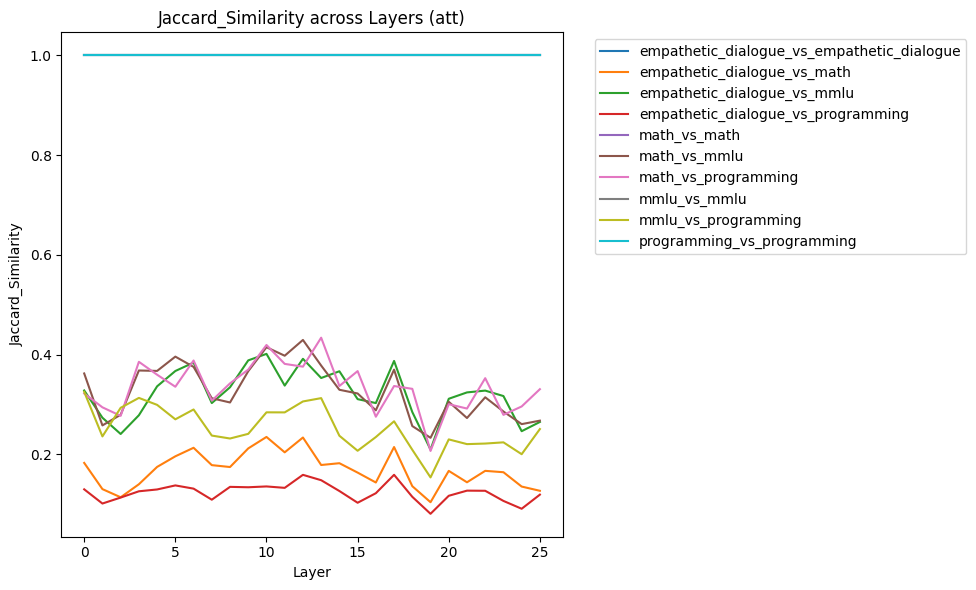

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

output_path = "/content/drive/MyDrive/LLM Interpretability/Figures"

def get_graph(typ, algorithm):
    df_temp = df[df['Type'] == typ].copy()

    # Canonical pair label
    df_temp['Pair'] = df_temp[['Class1','Class2']].apply(
        lambda x: '_vs_'.join(sorted(x)), axis=1
    )

    # Pivot
    pivot = df_temp.pivot_table(
        index='Layer',
        columns='Pair',
        values=algorithm,
        aggfunc='mean'
    )

    # Plot: plain solid lines
    plt.figure(figsize=(10,6))
    for pair in pivot.columns:
        plt.plot(pivot.index, pivot[pair], label=pair)
    plt.xlabel('Layer')
    plt.ylabel(algorithm)
    plt.title(f'{algorithm} across Layers ({typ})')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'{output_path}/{algorithm}_{typ}.png')
    plt.show()

TYPES = ["res", "mlp", "att"]
ALGORITHMS = ["Spearman_Correlation", "Pearson_Correlation", "Cosine_Similarity", "Jaccard_Similarity"]

for typ in TYPES:
  for algorithm in ALGORITHMS:
    get_graph(typ, algorithm)